In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train_2016.csv')
prop = pd.read_csv('properties_2016.csv')

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
prop['bed2bath'] = prop['bedroomcnt']/prop['bathroomcnt']
prop['bed2calbath'] = prop['bedroomcnt']/prop['calculatedbathnbr']
prop['areaperbedroom'] = prop['calculatedfinishedsquarefeet']/prop['bedroomcnt']
prop['livingarearate'] = prop['finishedsquarefeet12']/prop['finishedsquarefeet15']
prop['bed2fullbath'] = prop['bedroomcnt']/prop['fullbathcnt']
prop['areaperroom'] = prop['calculatedfinishedsquarefeet']/prop['roomcnt']
prop['houseage'] = 2016 - prop['yearbuilt']

In [5]:
for c, dtype in zip(prop.columns, prop.dtypes):
    if dtype == np.float64:
        prop[c] = prop[c].astype(np.float32)

df_train = train.merge(prop, how='left', on='parcelid')

x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)

train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

(90811, 62) (90811,)


In [6]:
sample = pd.read_csv('sample_submission.csv')
sample['parcelid'] = sample['ParcelId']
df_test = sample.merge(prop, on='parcelid', how='left')

x_test = df_test[train_columns]

In [7]:
print('train size:', x_train.shape, 'test size:', x_test.shape)

train size: (90811, 62) test size: (2985217, 62)


In [22]:
x = pd.concat([x_train, x_test])
x = x.replace(np.inf, 0)

for var in x.columns[x_train.dtypes == 'object']:
    x[var] = x[var].fillna(x[var].mode())
    
for var in x.columns[x.dtypes != 'object']:
    x[var] = x[var].fillna(x[var].dropna().mean())

## Ploting

In [10]:
x.columns[x.dtypes != 'object']

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvalue

In [11]:
import matplotlib.pyplot as plt

In [16]:
length = x.shape[0]
def dot_plot(colname):
    plt.close()
    plt.plot(range(length), x[colname], '.')
    plt.ylabel(colname)
    plt.show()

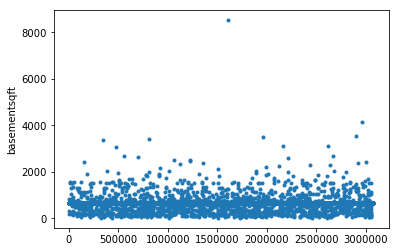

In [23]:
dot_plot('basementsqft')

In [30]:
x['basementsqft'][x['basementsqft'] >6000] = np.mean(x['basementsqft'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


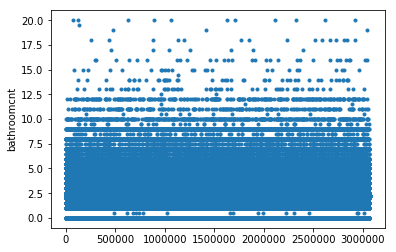

In [24]:
dot_plot('bathroomcnt')

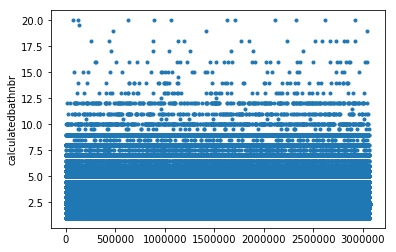

In [25]:
dot_plot('calculatedbathnbr')

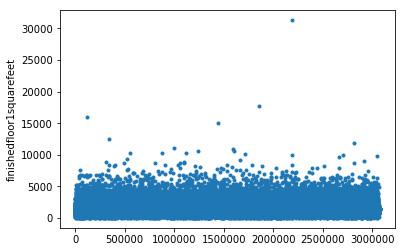

In [27]:
dot_plot('finishedfloor1squarefeet')

In [28]:
x['finishedfloor1squarefeet'][x['finishedfloor1squarefeet'] >20000] = np.mean(x['finishedfloor1squarefeet'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
x['finishedsquarefeet12'][x['finishedsquarefeet12'] >200000] = np.mean(x['finishedsquarefeet12'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
x['finishedsquarefeet6'][x['finishedsquarefeet6'] > 400000] = np.mean(x['finishedsquarefeet6'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
x['poolsizesum'][x['poolsizesum'] > 10000] = np.mean(x['poolsizesum'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
x['numberofstories'][x['numberofstories'] > 25] = np.mean(x['numberofstories'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
x['areaperbedroom'][x['areaperbedroom'] > 100000 ] = np.mean(x['areaperbedroom'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


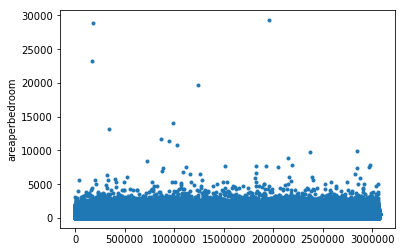

In [33]:
dot_plot('areaperbedroom')

In [38]:
x['areaperroom'][x['areaperroom'] > 30000 ] = np.mean(x['areaperroom'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


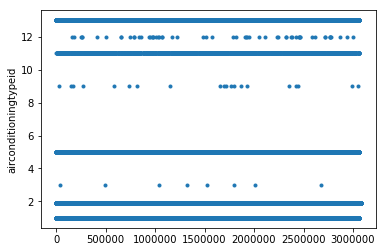

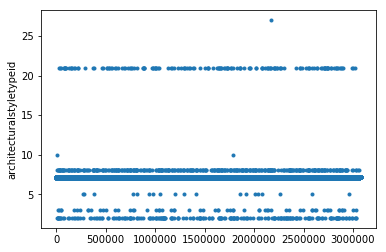

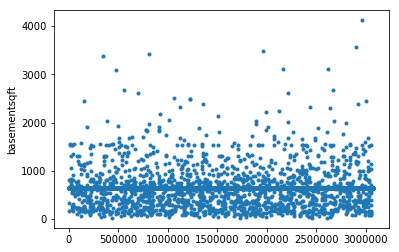

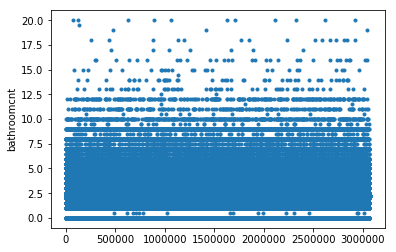

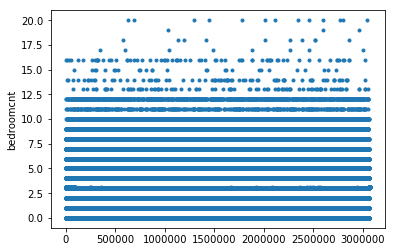

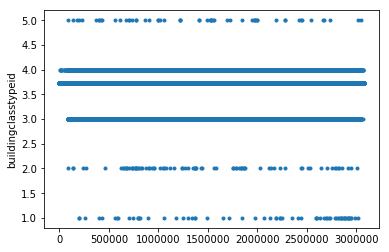

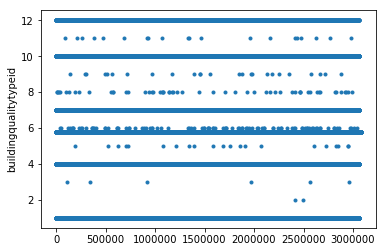

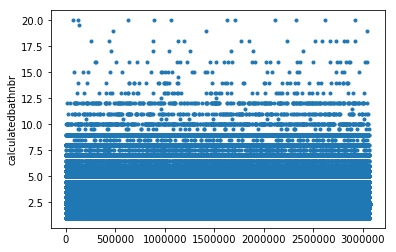

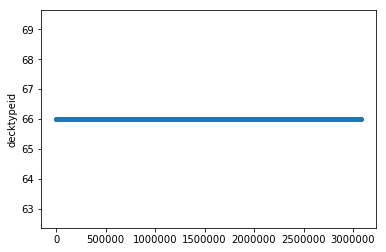

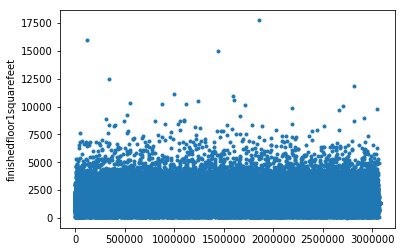

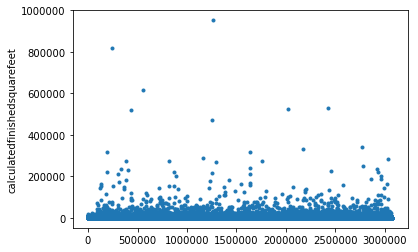

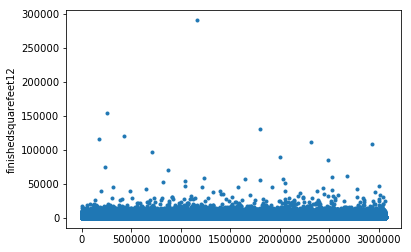

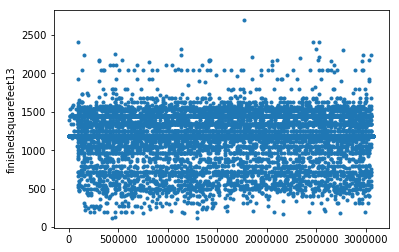

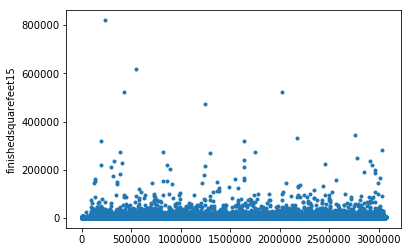

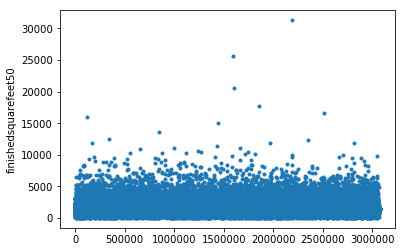

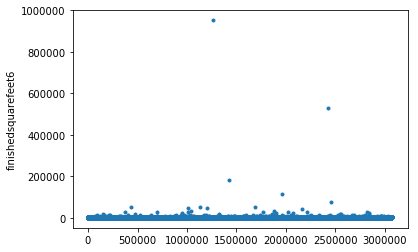

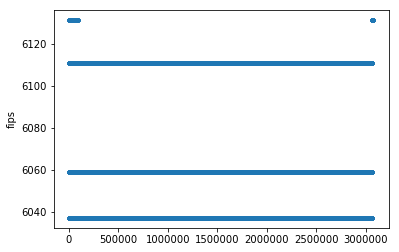

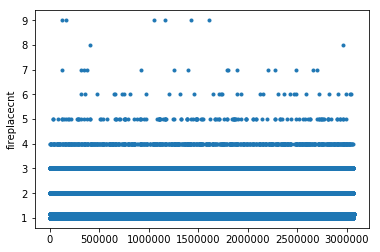

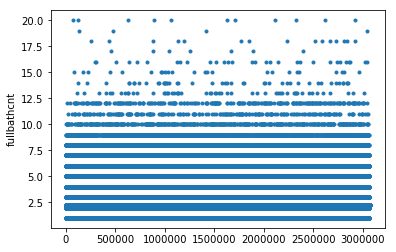

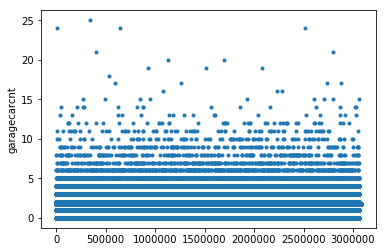

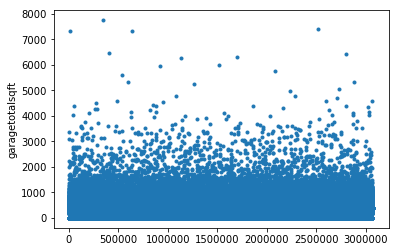

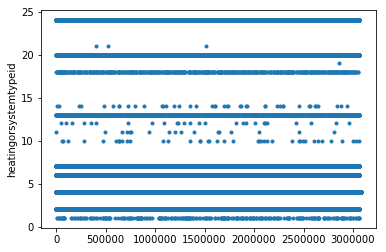

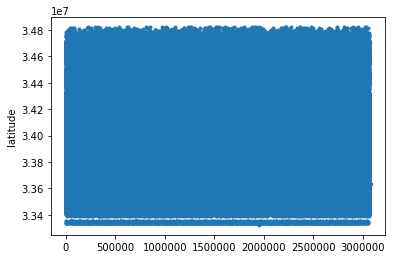

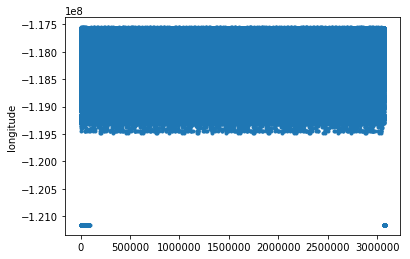

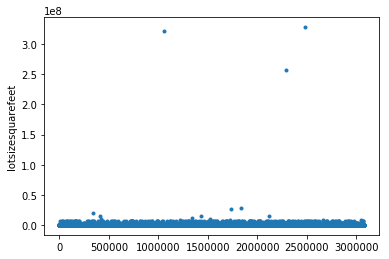

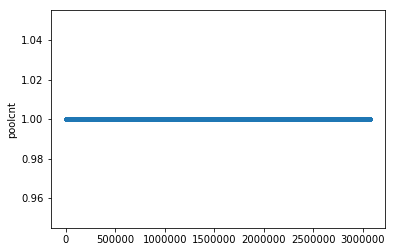

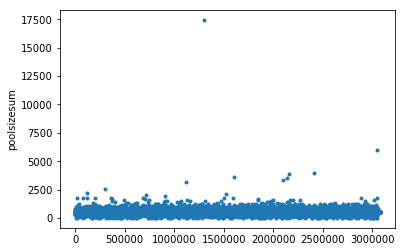

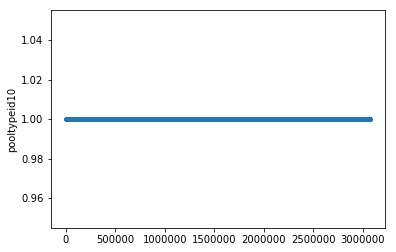

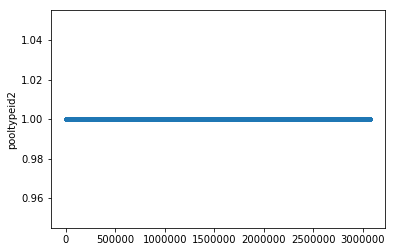

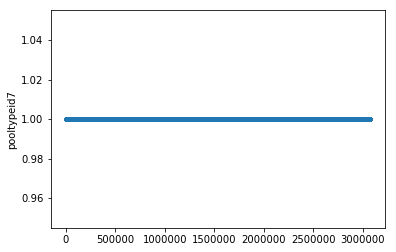

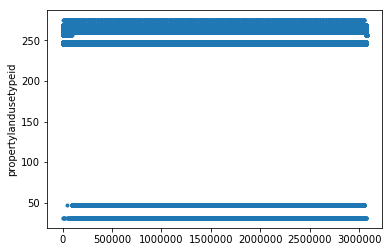

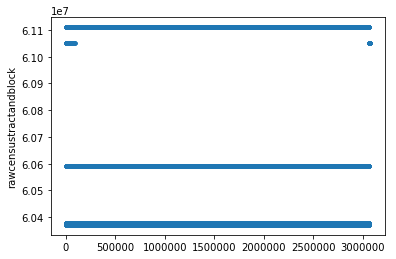

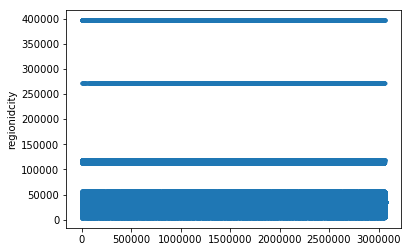

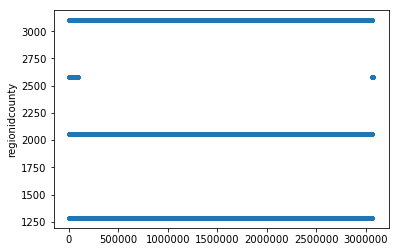

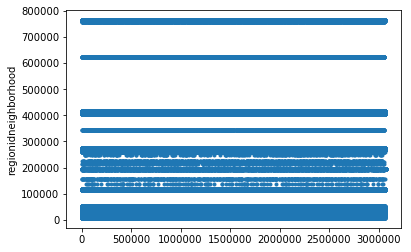

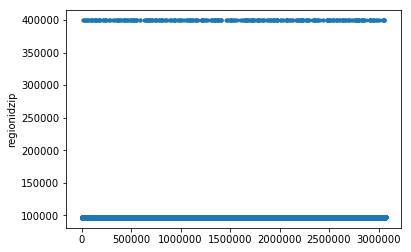

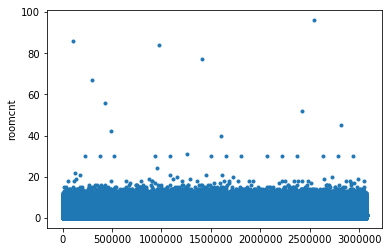

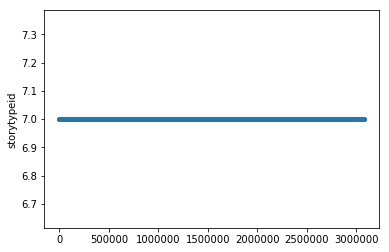

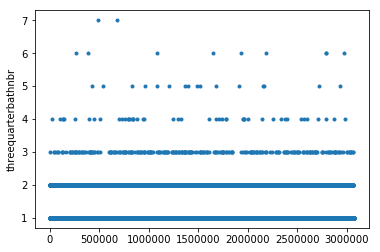

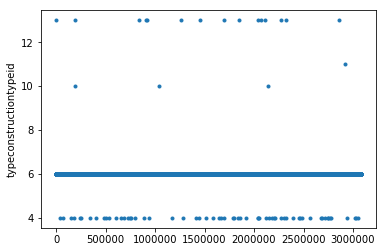

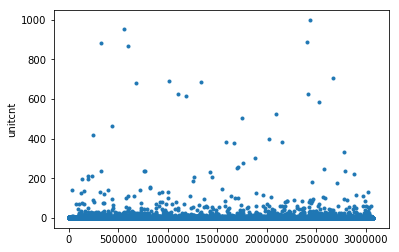

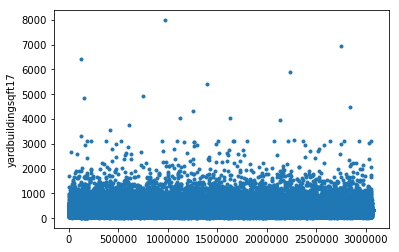

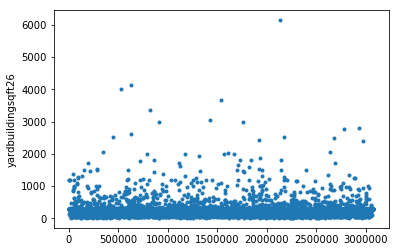

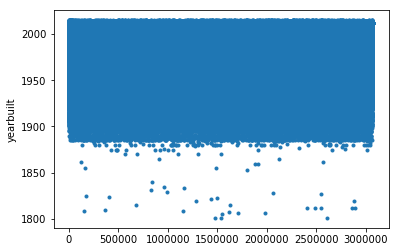

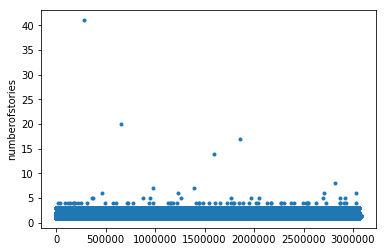

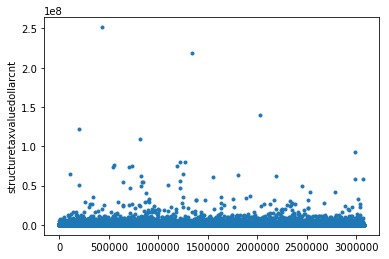

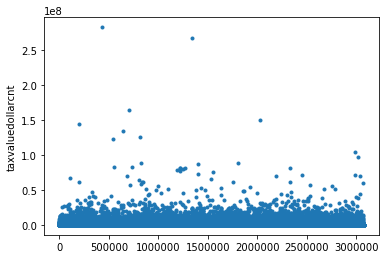

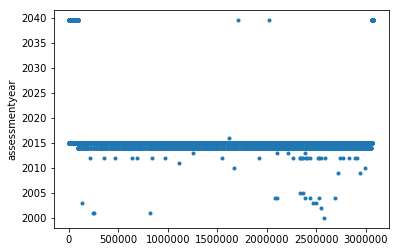

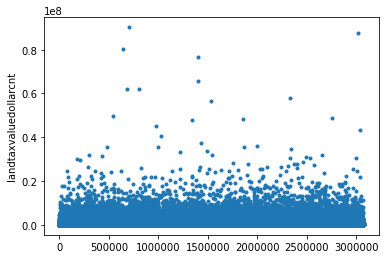

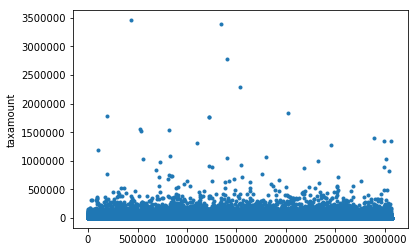

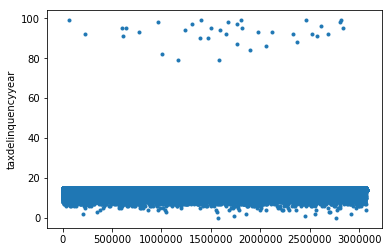

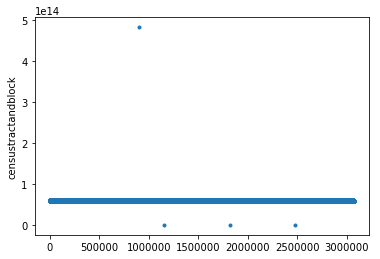

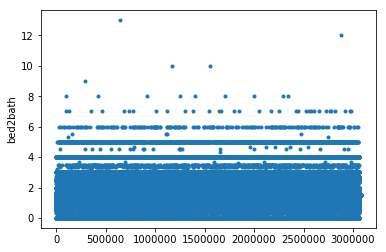

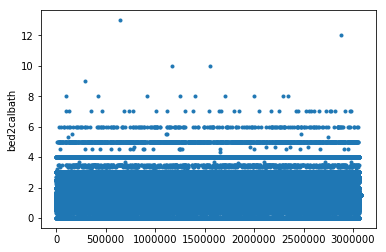

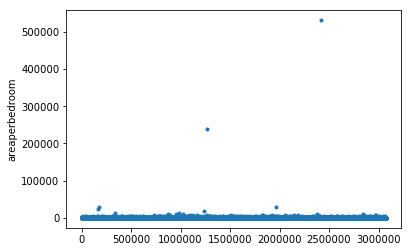

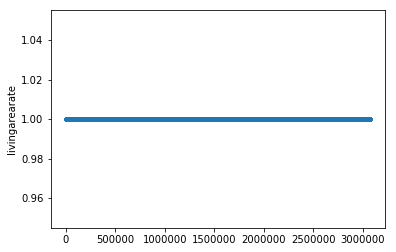

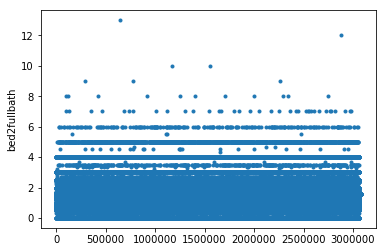

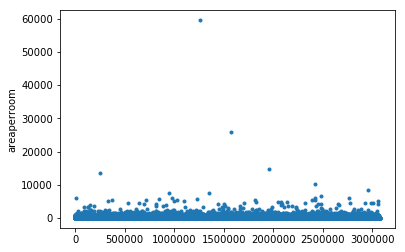

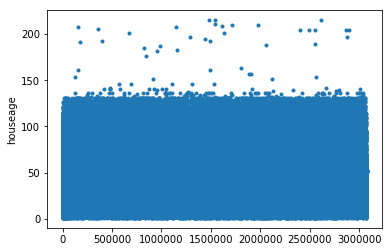

In [31]:
for var in x.columns[x.dtypes != 'object']:
    dot_plot(var)

In [64]:
x[:90811].to_csv('x_train.csv')
x[90811:].to_csv('x_test.csv')

In [40]:
x_train = x[:90811]

In [44]:
train = pd.read_table('train_2016.csv', sep=',')
data = pd.read_table('properties_2016.csv', header=0, index_col=None, sep=',')
df_train = train.merge(data, how='left', on='parcelid')
y_train = df_train['logerror']

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
x['bathroomcnt'][x['bathroomcnt'] > 14] = np.mean(x['bathroomcnt'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
x['calculatedbathnbr'][x['calculatedbathnbr'] > 14.9] = np.mean(x['calculatedbathnbr'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
x['finishedsquarefeet15'][x['finishedsquarefeet15'] > 10000] = np.mean(x['finishedsquarefeet15'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
x['fullbathcnt'][x['fullbathcnt'] > 14.9] = np.mean(x['fullbathcnt'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
x['garagecarcnt'][x['garagecarcnt'] > 15] = np.mean(x['garagecarcnt'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
x['garagetotalsqft'][x['garagetotalsqft'] > 5000] = np.mean(x['garagetotalsqft'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
x['lotsizesquarefeet'][x['lotsizesquarefeet'] > 3000000] = np.mean(x['lotsizesquarefeet'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
x['poolsizesum'][x['poolsizesum'] > 1500] = np.mean(x['poolsizesum'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
x['regionidzip'][x['regionidzip'] < 100000] = 1
x['regionidzip'][x['regionidzip'] > 100000] = 2

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [61]:
x['unitcnt'][x['unitcnt'] > 40] = np.mean(x['unitcnt'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
x['assessmentyear'][x['assessmentyear'] < 2025] = 1
x['assessmentyear'][x['assessmentyear'] >= 2025] = 2

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
x['areaperbedroom'][x['areaperbedroom'] > 3700] = np.mean(x['areaperbedroom'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
x['areaperroom'][x['areaperroom'] > 3000] = np.mean(x['areaperroom'])

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
x[''][x[''] > 40] = np.mean(x[''])

In [ ]:
x[''][x[''] > 40] = np.mean(x[''])

In [48]:
x.columns[x.dtypes != 'object']

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvalue

In [45]:
def scatter_plot(colname):
    plt.close()
    plt.plot(x_train[colname], y_train, '.')
    plt.xlabel(colname)
    plt.ylabel('logerror')
    plt.show()

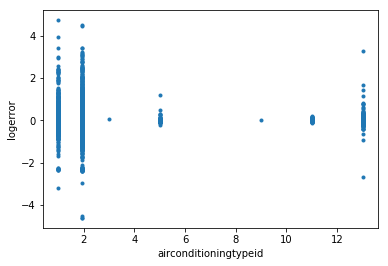

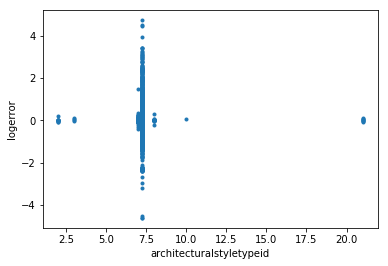

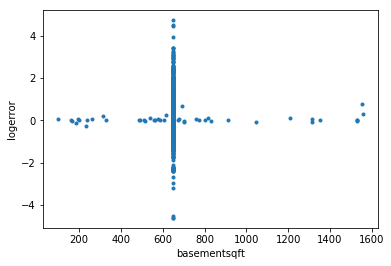

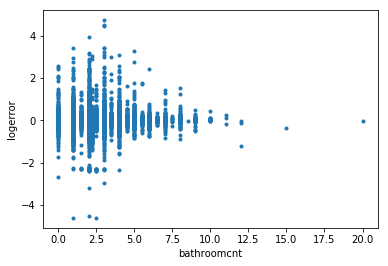

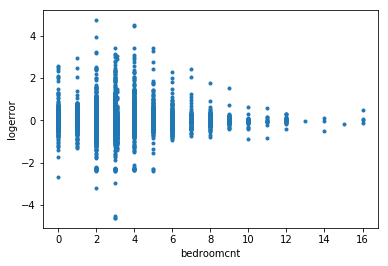

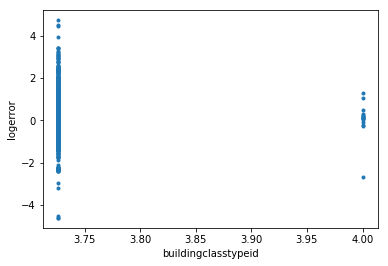

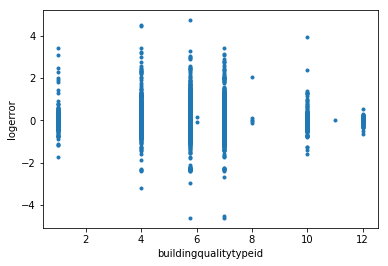

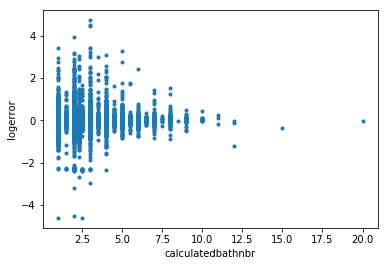

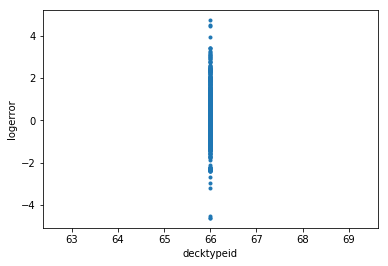

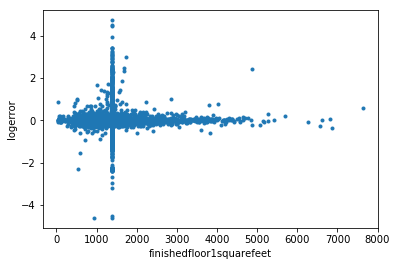

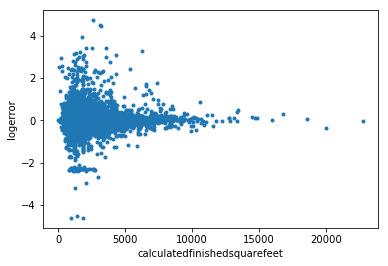

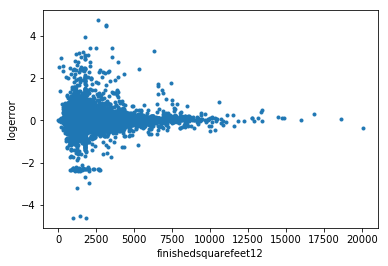

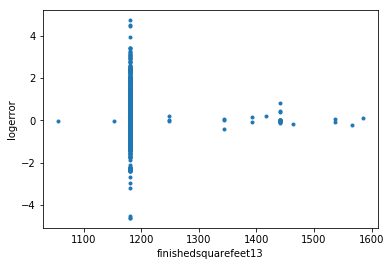

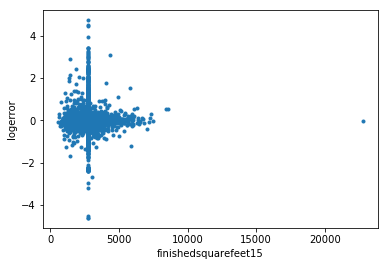

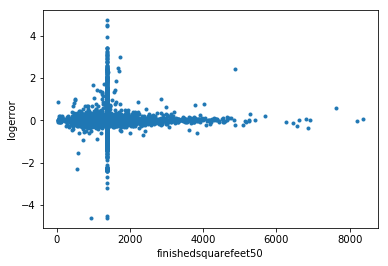

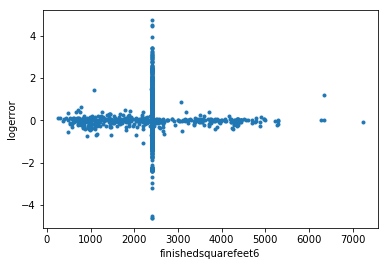

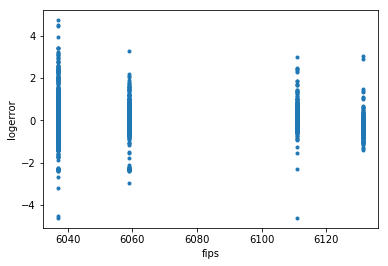

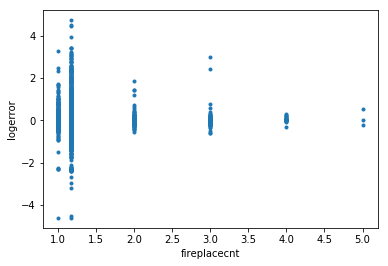

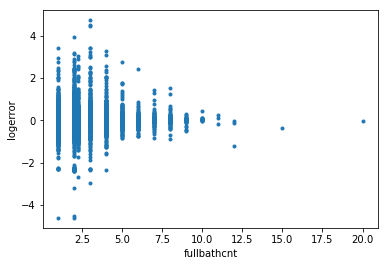

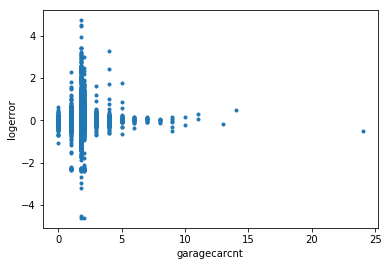

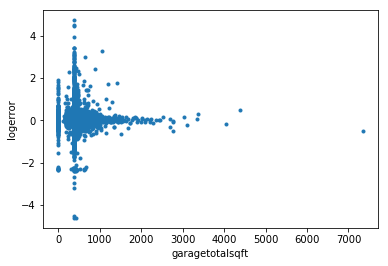

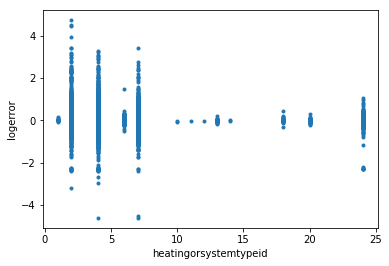

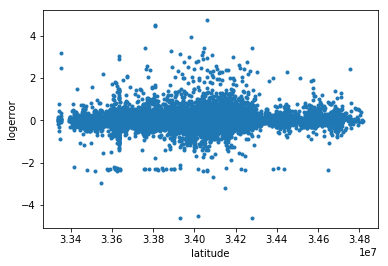

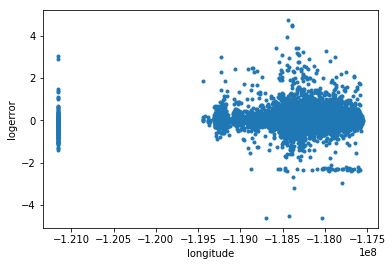

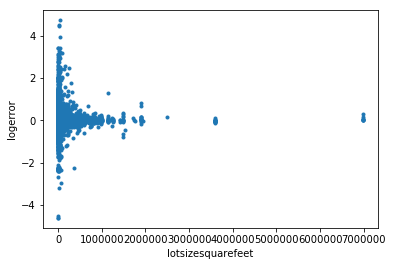

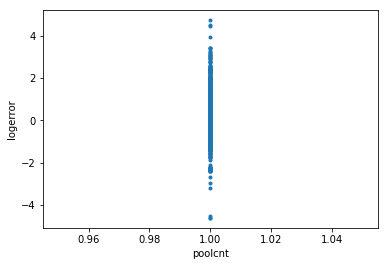

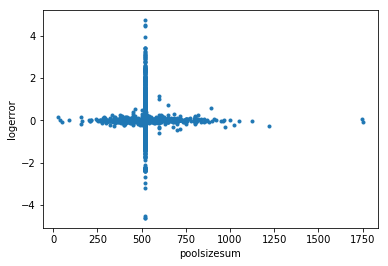

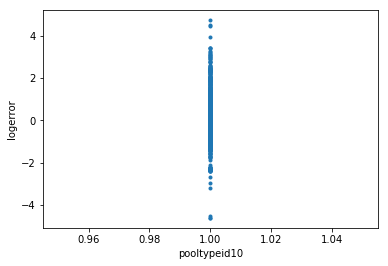

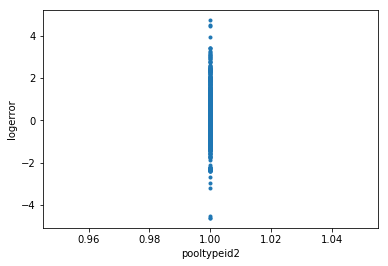

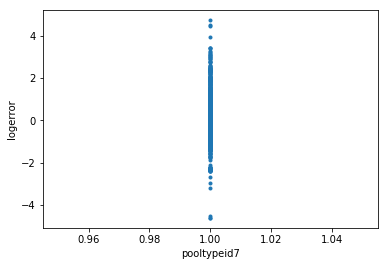

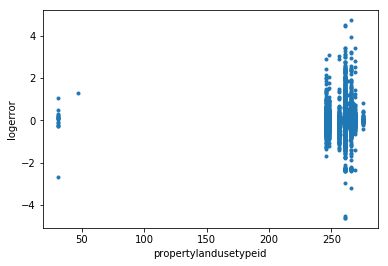

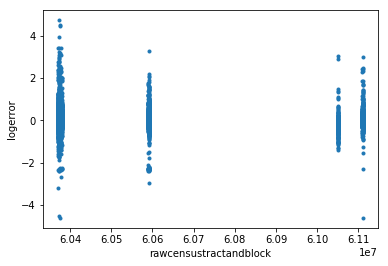

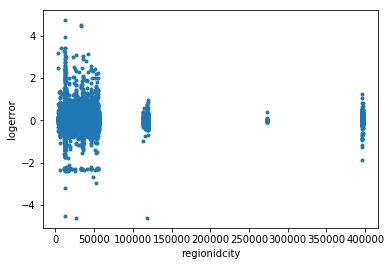

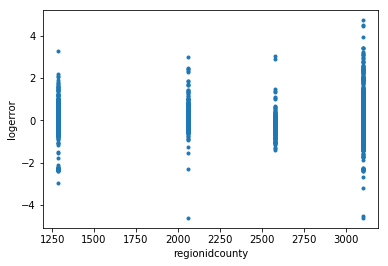

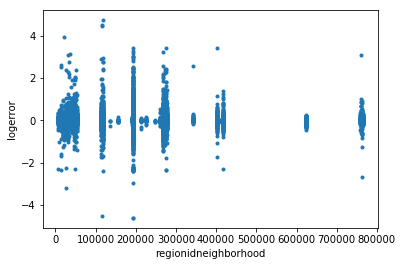

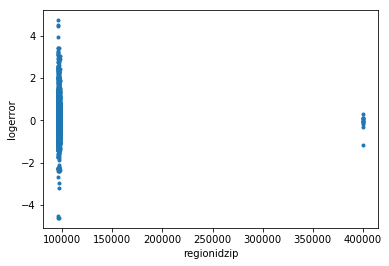

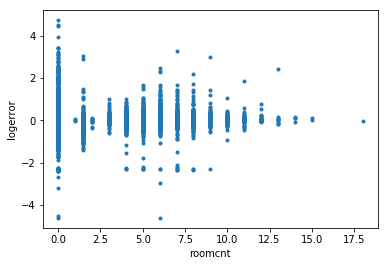

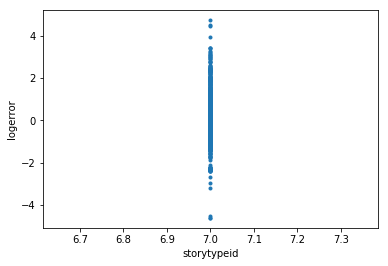

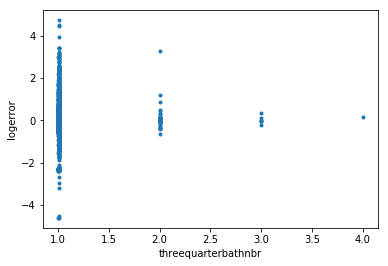

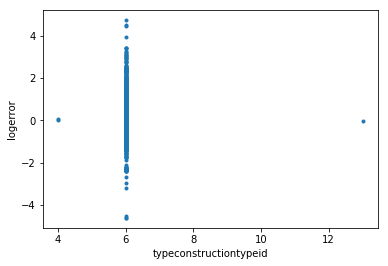

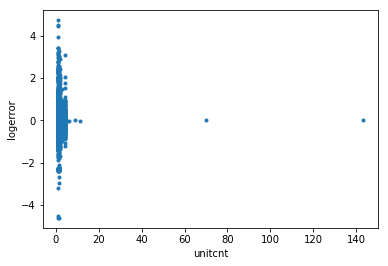

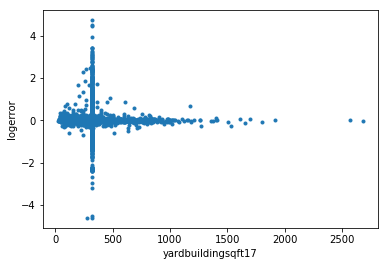

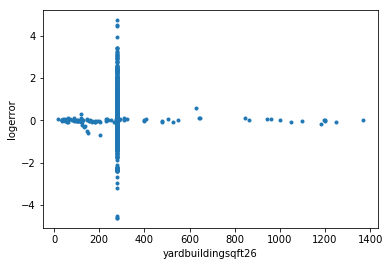

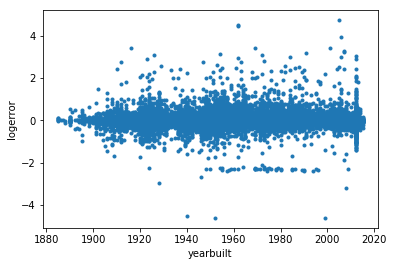

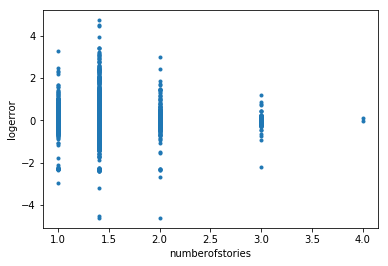

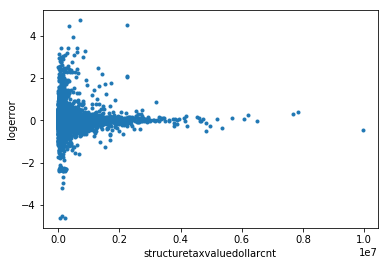

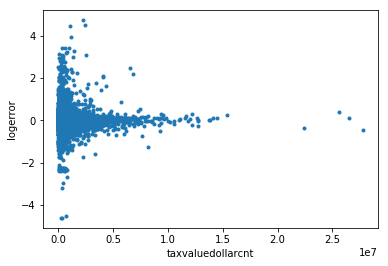

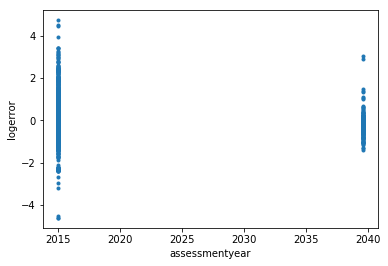

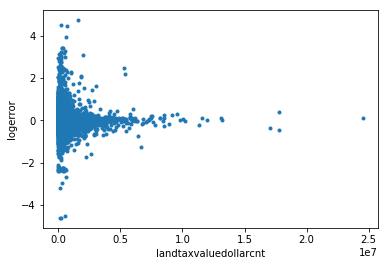

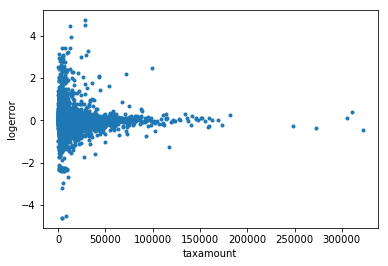

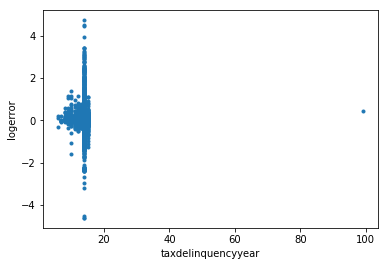

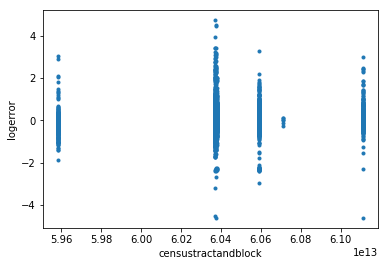

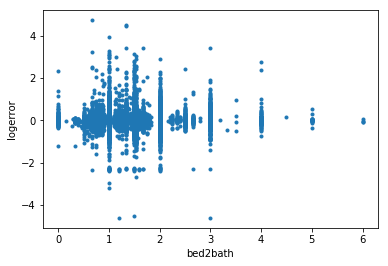

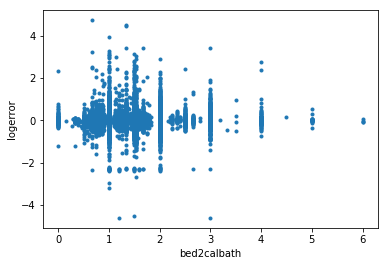

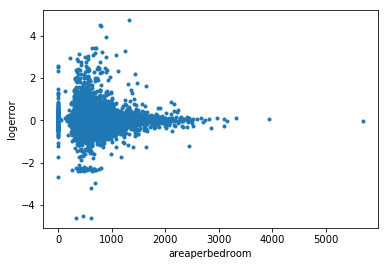

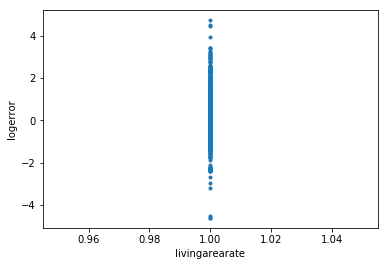

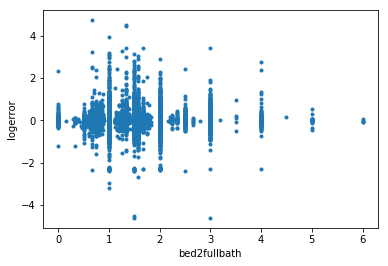

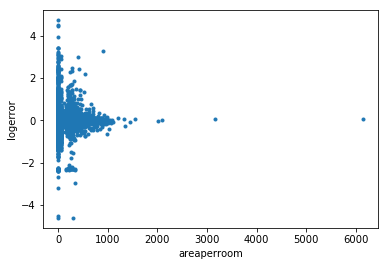

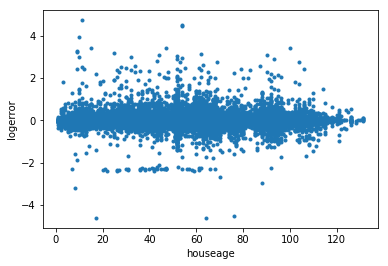

In [46]:
for var in x.columns[x.dtypes != 'object']:
    scatter_plot(var)